In [1]:
import pandas as pd
import numpy as np


In [2]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/Hemanthkaruturi/python_for_datascience/master/data/diamonds.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds = diamonds.drop(columns=['Unnamed: 0'])

In [5]:
# check missing values
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

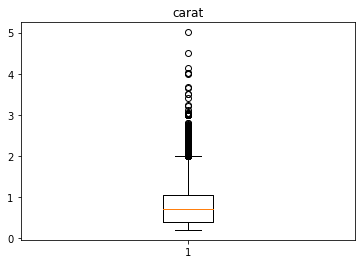

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(diamonds['carat'])
plt.title('carat')
plt.show()

In [8]:
def box_plot(df, column):
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()

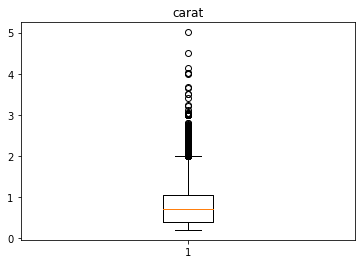

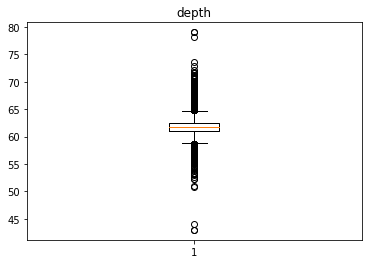

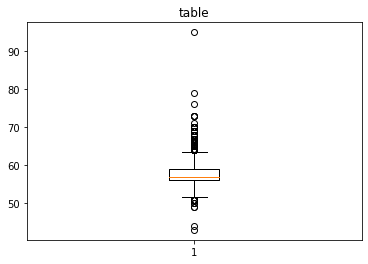

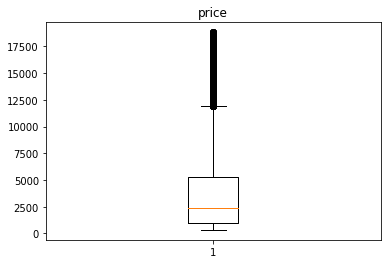

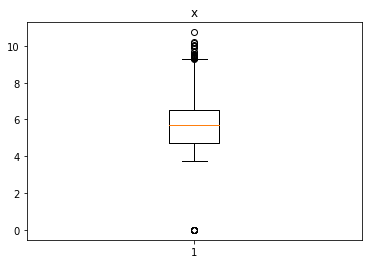

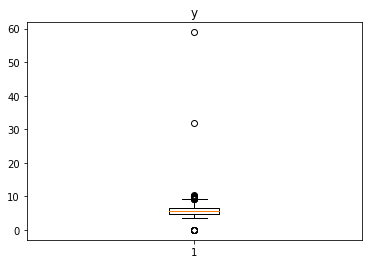

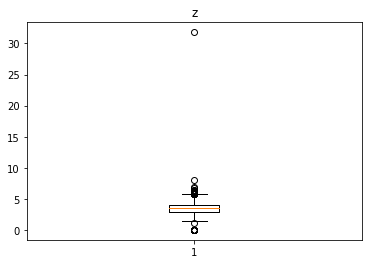

In [9]:
columns = ['carat', 'depth', 'table', 'price', 'x', 'y','z']
for column in columns:
  box_plot(diamonds, column)

In [10]:
# remove outliers
from scipy.stats import zscore
z_score = np.abs(zscore(diamonds['carat']))

In [11]:
diamonds[(z_score<3)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
diamonds_no_out = diamonds.copy()
for column in columns:
  z = zscore(diamonds_no_out[column])
  diamonds_no_out = diamonds_no_out[(z < 3)]

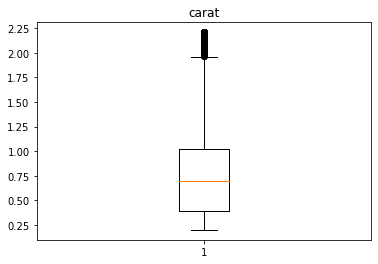

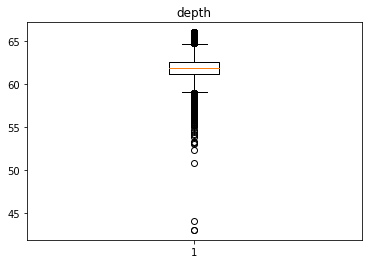

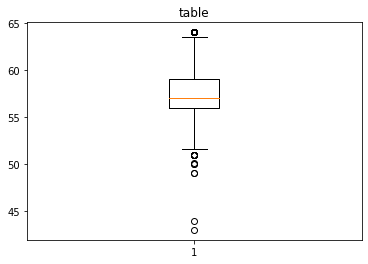

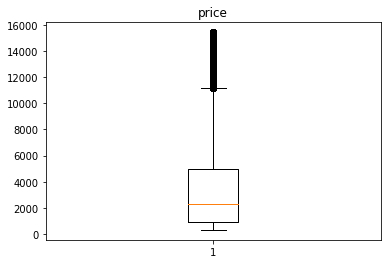

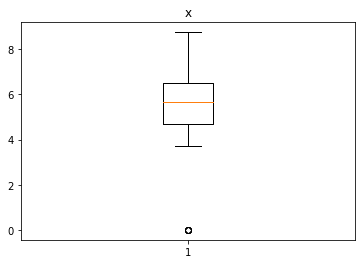

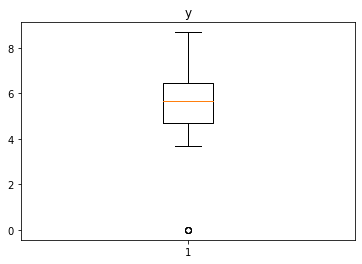

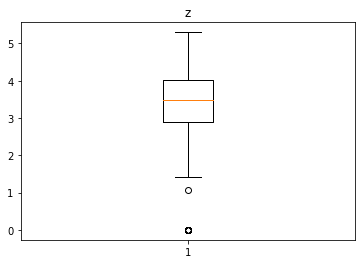

In [13]:
for column in columns:
  box_plot(diamonds_no_out, column)

In [14]:
diamonds_no_out.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [15]:
# create dummies for categorical columns
pd.get_dummies(diamonds_no_out[['cut', 'color', 'clarity']])

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [16]:
diamonds_no_out

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
dummies = pd.get_dummies(diamonds_no_out[['cut', 'color', 'clarity']])

In [18]:
# concat
df = pd.concat([diamonds_no_out[columns], dummies], axis=1)

In [19]:
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [20]:
# normalize
X = df.drop(columns=['price'])
y = df['price']

In [21]:
from sklearn.preprocessing import normalize
X = normalize(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
X_train.shape

(38745, 26)

In [ ]:
X_test.shape

(12916, 26)

In [23]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_fit = model.fit(X_train, y_train)

In [24]:
model_fit.intercept_

36956.672103985795

In [25]:
model_fit.coef_

array([ 990649.32566848,  -28519.52958395,  -24796.06252853,
       -173605.70065708,   61406.02458199,   -6744.58525505,
         53337.68223348,   89212.34504728,  112939.77611928,
        109452.85183336,  100254.74772854,  129982.45299324,
        113780.66956847,  107846.49783337,   92700.68973884,
         53655.9782665 ,   14596.54979382,  -47365.4352323 ,
       -202470.64064546,  164769.88136184,   42314.85507423,
        -32630.08492652,  112274.73292751,   88964.82166317,
        146829.52301277,  145144.31449441])

In [26]:
model_fit.predict(X_test)

array([ 4829.09743927,  6104.07605896,    49.0025636 , ...,
         865.67750644,  4868.55142904, -1305.82358168])

In [27]:
predictions = model_fit.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

845606.2192104073

In [29]:
model_fit.score(X_test, y_test)

0.9266346933342945

## Step wise forward feature selection

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = LinearRegression()

sfs = SFS(model, k_features=10, forward=True, cv=5)

sfs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=10, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring=None, verbose=0)

In [31]:
sfs.k_feature_names_

('0', '3', '15', '16', '17', '18', '20', '21', '22', '23')

## Support vector regression

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
model_fit = model.fit(X_train, y_train)
predictions = model_fit.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))
print('Score:', model_fit.score(X_test, y_test))

MSE: 12976951.192712111
Score: -0.12588812878908384


## Decision tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_features='auto', random_state=123)
model_fit = model.fit(X_train, y_train)
predictions = model_fit.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))
print('Score:', model_fit.score(X_test, y_test))

MSE: 368957.75392923504
Score: 0.9679890022698936


In [33]:
model.feature_importances_

array([8.71794945e-01, 1.50734219e-03, 1.28583805e-03, 1.87296203e-03,
       3.37012684e-03, 2.41100201e-03, 3.47009854e-04, 4.71511115e-04,
       1.37714328e-03, 7.46378492e-04, 4.05672737e-04, 2.87784050e-03,
       1.81937248e-03, 1.85139032e-03, 2.58232782e-03, 6.74621482e-03,
       8.41507590e-03, 1.16335766e-02, 1.57592283e-02, 4.25449217e-03,
       1.36124556e-02, 1.95770518e-02, 8.04043088e-04, 2.09514932e-03,
       5.63030788e-03, 1.67515420e-02])

In [34]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [37]:
columns  = list(df.columns)

In [38]:
columns.remove('price')

<BarContainer object of 26 artists>

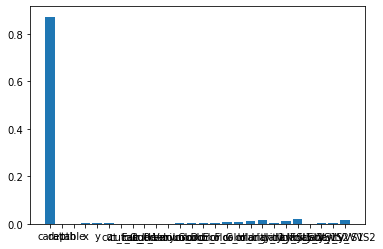

In [39]:
import matplotlib.pyplot as plt
plt.bar(x=columns, height=model.feature_importances_)

In [40]:
feature_df = pd.DataFrame({'Features':columns, 'score': model.feature_importances_})
feature_df.head()

,Features,score
0,carat,0.871795
1,depth,0.001507
2,table,0.001286
3,x,0.001873
4,y,0.003370


In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=123)
model_fit = model.fit(X_train, y_train)
predictions = model_fit.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))
print('Score:', model_fit.score(X_test, y_test))

MSE: 192711.1128827659
Score: 0.9832802673710994


In [43]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(random_state=123)

score = cross_val_score(model, X_train, y_train, cv=10)

print(score.mean())

0.9818986038706129


In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(random_state=123)
model_fit = model.fit(X_train, y_train)
predictions = model_fit.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))
print('Score:', model_fit.score(X_test, y_test))

MSE: 2057072.728092746
Score: 0.8215271268095631


## Hyper parameter tuning

In [45]:
# gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

model = Ridge(random_state=123)

params = {'alpha':[0.5, 1.0], 'max_iter':[10,20], 'solver':[ 'sag', 'saga']}

search = GridSearchCV(model, params)

search.fit(X_train, y_train)

print("Best Estimators",search.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best Estimators Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      random_state=123, solver='sag', tol=0.001)


In [46]:
print(search.score(X_test, y_test))

0.8385279385654815


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=123)
model_fit = model.fit(X_train, y_train)
predictions = model_fit.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))
print('Score:', model_fit.score(X_test, y_test))  

MSE: 372363.9117282595
Score: 0.9676934819605578


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=123)
model_fit = model.fit(X_train, y_train)
predictions = model_fit.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))
print('Score:', model_fit.score(X_test, y_test))  

[04:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 369925.0064445252
Score: 0.9679050828570566


In [ ]:
# cross_val_score
# GridSearchCV